In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("results/sample_1.csv")

In [92]:
methods = ["MMD", "MMD OCSVM Verify", "OCSVM"]
model_types = {"kernel=\'linear\'" : "linear", "SVR(":"non-linear", "LinearRegression" : "LReg"}
kernel_colors = {"linear" : "r", "non-linear" : "b", "LReg" : "o"}
colors = ["bo", "go", "ro", "co", "mo", "yo", "ko"]
direction_markers = [">", "<"]
marker_meaning = {">" : "forward", "<" : "backwards"}
normalized = {True : "-std", False: ""}
alpha_norm = {True : 1/3, False: 2/3}

In [97]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_r2_discrpenacy(data):
    for i in range(3):
        df = data.loc[(data.experiment==3)&(data.method==methods[i])]
        n_pairs =  int(df.shape[0]/(2*3))

        fig, axs = plt.subplots(nrows = int(n_pairs/2), ncols = 1, 
                                sharex="row", sharey='row',
                                figsize= (5 ,4  * int(n_pairs/2)))

        similar_pairs = [str((pair[0], pair[1])) for pair in df[["model_node", "test_node"]].values[:n_pairs]]

        for row in df.itertuples(index=True, name='Pandas'):
            model_type = [model_types[m] for m in model_types if m in row.model][0]
            if model_type  in ["linear", "non-linear"]:
                pair = str((row.model_node, row.test_node))
                label = "".join([model_type, normalized[row.std]])

                pair_index = similar_pairs.index(pair)
                direction = pair_index % 2

                color = kernel_colors[model_type]
                x, y = row.discrepancy, row.score

                pair_row = (pair_index - direction) % int(n_pairs/2)
                args = [color, label, alpha_norm[row.std], direction_markers[direction]]

                if int(n_pairs/2) == 1:
                    axs.plot(x, y, args[0], label = args[1], alpha = args[2], marker = args[3])
                    axs.set_title(pair)
                else:
                    axs[pair_row].plot(x, y, args[0], label = args[1], alpha = args[2], marker = args[3])
                    axs[pair_row].set_title(pair)

        fig.suptitle(methods[i], fontsize =20)
        fig.tight_layout(pad=2.0)
        
        if int(n_pairs/2)==1:
            axs.set_xlabel("Discrepancy")
            axs.set_ylabel("Coefficient of Determination")
        else:
            for r in range(int(n_pairs/2)):
                axs[r].set_xlabel("Discrepancy")
                axs[r].set_ylabel("Coefficient of Determination")
        
        d = df[["model_node", "test_node"]].values
        x = d[:,0]
        y = d[:,1]
        kernel_lines = [Line2D(x, y, c= kernel_colors[k], alpha = 2/3, linewidth=5) for k in ["linear","non-linear"]]
        std_lines = [Line2D(x, y, c= "r", alpha = alpha_norm[True], linewidth = 5)]
        direction_lines = [Line2D(x, y, c= "b", alpha = 2/3, marker = marker, linewidth = 0) for marker in direction_markers]

        lines = kernel_lines + std_lines + direction_lines

        plt.legend(lines, ["linear", "non-linear", "std", "forward", "backwards"])
        plt.show()

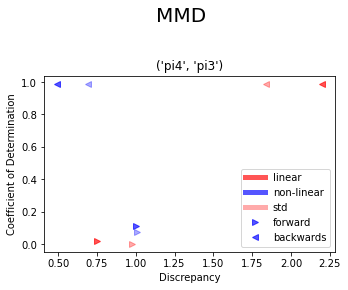

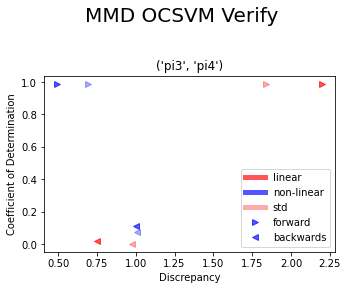

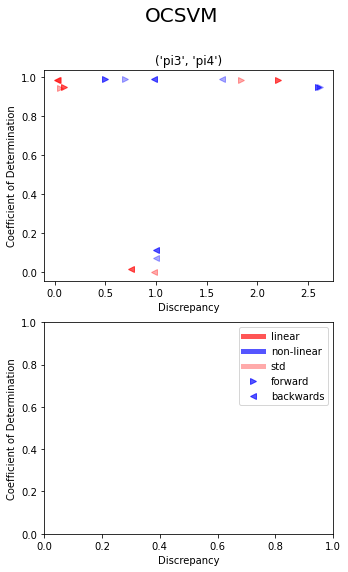

In [98]:
# for i in range(3):
data = pd.read_csv(f"results/sample_{1}.csv") 
plot_r2_discrpenacy(data)